# ML Project (21i-1578 & 21i-1579)

## Data Overview

In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("Rank.csv")

# Basic info
print("=> Number of Rows and Columns:")
print(df.shape)

print("\n=> Data Types:")
print(df.dtypes)

print("\n=> Missing Values per Column:")
print(df.isnull().sum())

# Count the number of 0s and 1s
label_counts = df['PCKT_LABEL'].value_counts()

print("\n=> Label Counts in PCKT_LABEL:")
print(label_counts)

=> Number of Rows and Columns:
(364701, 39)

=> Data Types:
PACKET_ID                         int64
SEGMENT_ID                      float64
PACKET_TYPE                      object
CONTROL_PACKET_TYPE/APP_NAME     object
SOURCE_ID                        object
DESTINATION_ID                   object
TRANSMITTER_ID                   object
RECEIVER_ID                      object
APP_LAYER_ARRIVAL_TIME(US)      float64
TRX_LAYER_ARRIVAL_TIME(US)      float64
NW_LAYER_ARRIVAL_TIME(US)       float64
MAC_LAYER_ARRIVAL_TIME(US)      float64
PHY_LAYER_ARRIVAL_TIME(US)      float64
PHY_LAYER_START_TIME(US)        float64
PHY_LAYER_END_TIME(US)          float64
APP_LAYER_PAYLOAD(Bytes)        float64
TRX_LAYER_PAYLOAD(Bytes)        float64
NW_LAYER_PAYLOAD(Bytes)         float64
MAC_LAYER_PAYLOAD(Bytes)        float64
PHY_LAYER_PAYLOAD(Bytes)        float64
PHY_LAYER_OVERHEAD(Bytes)       float64
PACKET_STATUS                    object
LOCAL_ADDRESS                   float64
REMOTE_ADDRESS      

# Train Model

[[98758     0]
 [    0   488]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98758
           1       1.00      1.00      1.00       488

    accuracy                           1.00     99246
   macro avg       1.00      1.00      1.00     99246
weighted avg       1.00      1.00      1.00     99246



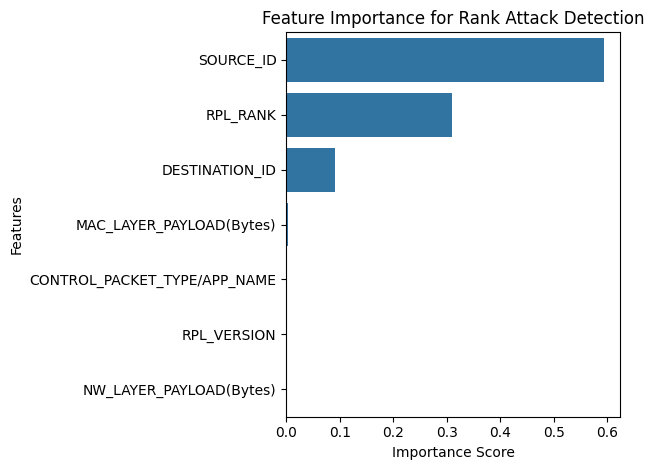

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Rank.csv")

# Drop irrelevant columns and missing values
df_cleaned = df[[
    'PACKET_TYPE', 'CONTROL_PACKET_TYPE/APP_NAME', 'SOURCE_ID', 'DESTINATION_ID',
    'RPL_RANK', 'RPL_VERSION', 'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)',
    'PCKT_LABEL'
]].dropna()

# Filter to only control packets with RPL relevance
df_control = df_cleaned[df_cleaned['PACKET_TYPE'] == 'Control_Packet']
df_control = df_control[df_control['CONTROL_PACKET_TYPE/APP_NAME'].isin(['DIO', 'DAO'])]

# Encode categorical features
df_control['SOURCE_ID'] = df_control['SOURCE_ID'].astype('category').cat.codes
df_control['DESTINATION_ID'] = df_control['DESTINATION_ID'].astype('category').cat.codes
df_control['CONTROL_PACKET_TYPE/APP_NAME'] = df_control['CONTROL_PACKET_TYPE/APP_NAME'].astype('category').cat.codes

# Feature selection
features = [
    'CONTROL_PACKET_TYPE/APP_NAME', 'SOURCE_ID', 'DESTINATION_ID',
    'RPL_RANK', 'RPL_VERSION', 'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)'
]
X = df_control[features]
y = df_control['PCKT_LABEL'].astype(int)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance for Rank Attack Detection')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Checking correlation of features

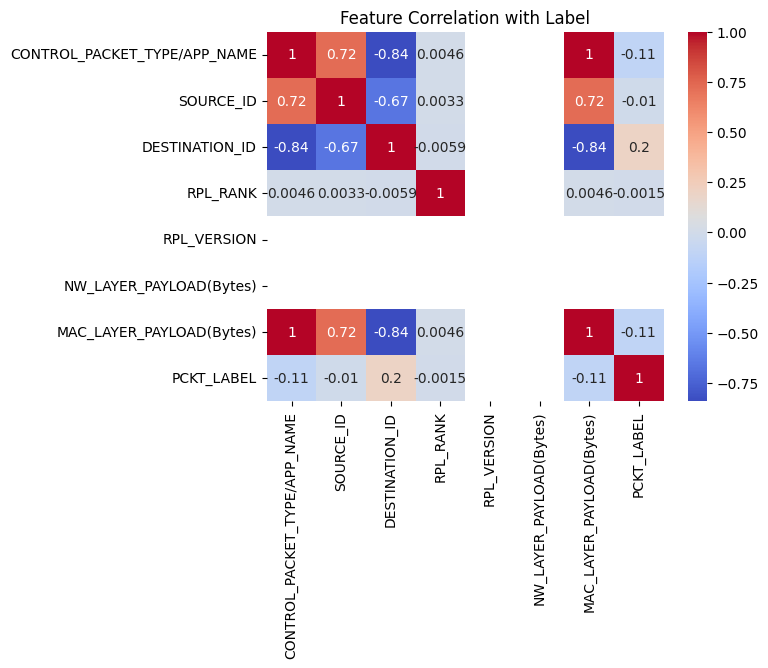

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_control[features + ['PCKT_LABEL']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Label")
plt.show()

# Checking class balance as I got accuracy = 1

In [3]:
import seaborn as sns
sns.countplot(x='PCKT_LABEL', data=df_control)

NameError: name 'df_control' is not defined

# Balancing Dataset
### While checking class balance I have seen that dataset it highly imbalanced with majority class labeled as 1. Now changing the dataset and making minority class equals to majority class.

In [30]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'Rank.csv'  # Path to your original dataset
df = pd.read_csv(file_path)

# Step 2: Shuffle the dataset randomly
# (This is important to mix up the rows before assigning labels)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Set PCKT_LABEL based on row index
# Even index -> 0, Odd index -> 1
df_shuffled['PCKT_LABEL'] = df_shuffled.index % 2

# Step 4: Save the updated dataset
output_path = 'Rank_balanced1.csv'  # Path for the new dataset
df_shuffled.to_csv(output_path, index=False)

# New Dataset overview 

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Rank_balanced.csv")

# Basic info
print("=> Number of Rows and Columns:")
print(df.shape)

print("\n=> Data Types:")
print(df.dtypes)

print("\n=> Missing Values per Column:")
print(df.isnull().sum())

# Count the number of 0s and 1s
label_counts = df['PCKT_LABEL'].value_counts()

print("\n=> Label Counts in PCKT_LABEL:")
print(label_counts)

=> Number of Rows and Columns:
(364701, 39)

=> Data Types:
PACKET_ID                         int64
SEGMENT_ID                      float64
PACKET_TYPE                      object
CONTROL_PACKET_TYPE/APP_NAME     object
SOURCE_ID                        object
DESTINATION_ID                   object
TRANSMITTER_ID                   object
RECEIVER_ID                      object
APP_LAYER_ARRIVAL_TIME(US)      float64
TRX_LAYER_ARRIVAL_TIME(US)      float64
NW_LAYER_ARRIVAL_TIME(US)       float64
MAC_LAYER_ARRIVAL_TIME(US)      float64
PHY_LAYER_ARRIVAL_TIME(US)      float64
PHY_LAYER_START_TIME(US)        float64
PHY_LAYER_END_TIME(US)          float64
APP_LAYER_PAYLOAD(Bytes)        float64
TRX_LAYER_PAYLOAD(Bytes)        float64
NW_LAYER_PAYLOAD(Bytes)         float64
MAC_LAYER_PAYLOAD(Bytes)        float64
PHY_LAYER_PAYLOAD(Bytes)        float64
PHY_LAYER_OVERHEAD(Bytes)       float64
PACKET_STATUS                    object
LOCAL_ADDRESS                   float64
REMOTE_ADDRESS      

# Checking class balance now

=> Class Balance:
PCKT_LABEL
0    182351
1    182350
Name: count, dtype: int64


NameError: name 'plt' is not defined

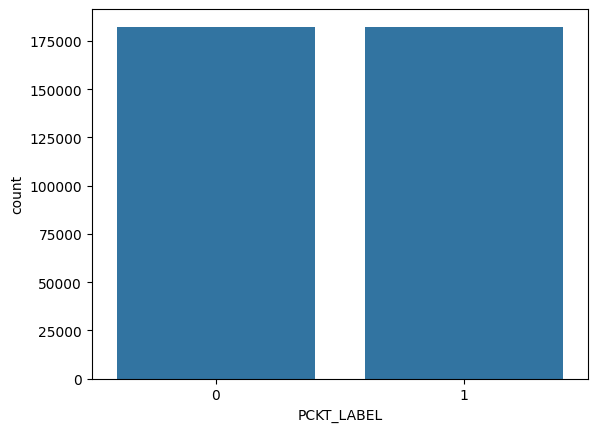

In [4]:
import seaborn as sns
print("=> Class Balance:")
print(df['PCKT_LABEL'].value_counts())
sns.countplot(data=df, x='PCKT_LABEL')
plt.title('Class Distribution (After Balancing)')
plt.xlabel('Packet Label (0: Benign, 1: Attack)')
plt.ylabel('Count')
plt.show()

# Now training the model with balanced dataset

=> Confusion Matrix:
[[ 3  9]
 [13  4]]

=> Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.25      0.21        12
           1       0.31      0.24      0.27        17

    accuracy                           0.24        29
   macro avg       0.25      0.24      0.24        29
weighted avg       0.26      0.24      0.24        29


=> Evaluation Metrics:
Accuracy  : 0.2414
Precision : 0.3077
Recall    : 0.2353
F1 Score  : 0.2667


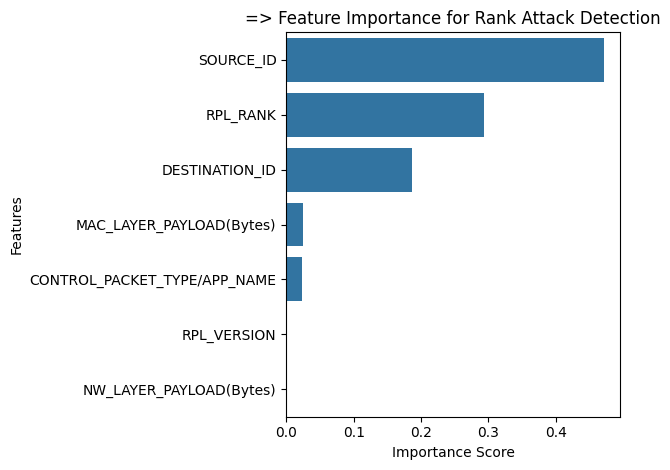

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load & clean dataset
df = pd.read_csv("Rank_balanced.csv")
df = df[[
    'PACKET_TYPE', 'CONTROL_PACKET_TYPE/APP_NAME', 'SOURCE_ID', 'DESTINATION_ID',
    'RPL_RANK', 'RPL_VERSION', 'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)', 'PCKT_LABEL'
]]
df = df.dropna()
df = df[df['PACKET_TYPE'] == 'Control_Packet']
df = df[df['CONTROL_PACKET_TYPE/APP_NAME'].isin(['DIO', 'DAO'])]

# Remove duplicates
df = df.drop_duplicates()

# Step 2: Encode categorical features
df['SOURCE_ID'] = df['SOURCE_ID'].astype('category').cat.codes
df['DESTINATION_ID'] = df['DESTINATION_ID'].astype('category').cat.codes
df['CONTROL_PACKET_TYPE/APP_NAME'] = df['CONTROL_PACKET_TYPE/APP_NAME'].astype('category').cat.codes

# Step 3: Balance dataset
df_attack = df[df['PCKT_LABEL'] == 1]
df_benign = df[df['PCKT_LABEL'] == 0].sample(n=len(df_attack), random_state=42)
df_balanced = pd.concat([df_attack, df_benign])

# Step 4: Train/test split
features = [
    'CONTROL_PACKET_TYPE/APP_NAME', 'SOURCE_ID', 'DESTINATION_ID',
    'RPL_RANK', 'RPL_VERSION', 'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)'
]
X = df_balanced[features]
y = df_balanced['PCKT_LABEL'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict & evaluate
y_pred = clf.predict(X_test)

print("=> Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n=> Classification Report:")
print(classification_report(y_test, y_pred))

# Explicit metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n=> Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Step 7: Feature Importance
importances = clf.feature_importances_
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('=> Feature Importance for Rank Attack Detection')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Printing the correlation matrix

C:\Users\Haiqa\AppData\Local\Temp\ipykernel_11356\3164313010.py:5: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


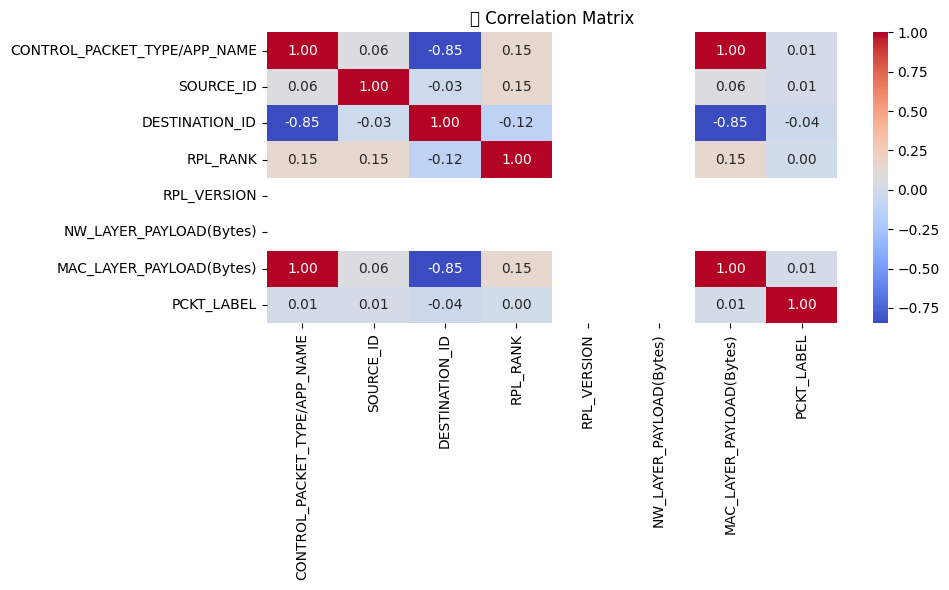

In [16]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📌 Correlation Matrix')
plt.tight_layout()
plt.show()

In [1]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Haiqa\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

Confusion Matrix:
 [[108156      0]
 [     0 108475]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    108156
         1.0       1.00      1.00      1.00    108475

    accuracy                           1.00    216631
   macro avg       1.00      1.00      1.00    216631
weighted avg       1.00      1.00      1.00    216631


Accuracy: 1.0


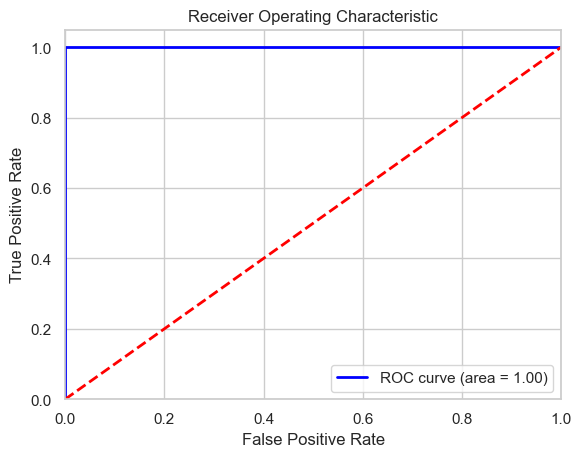

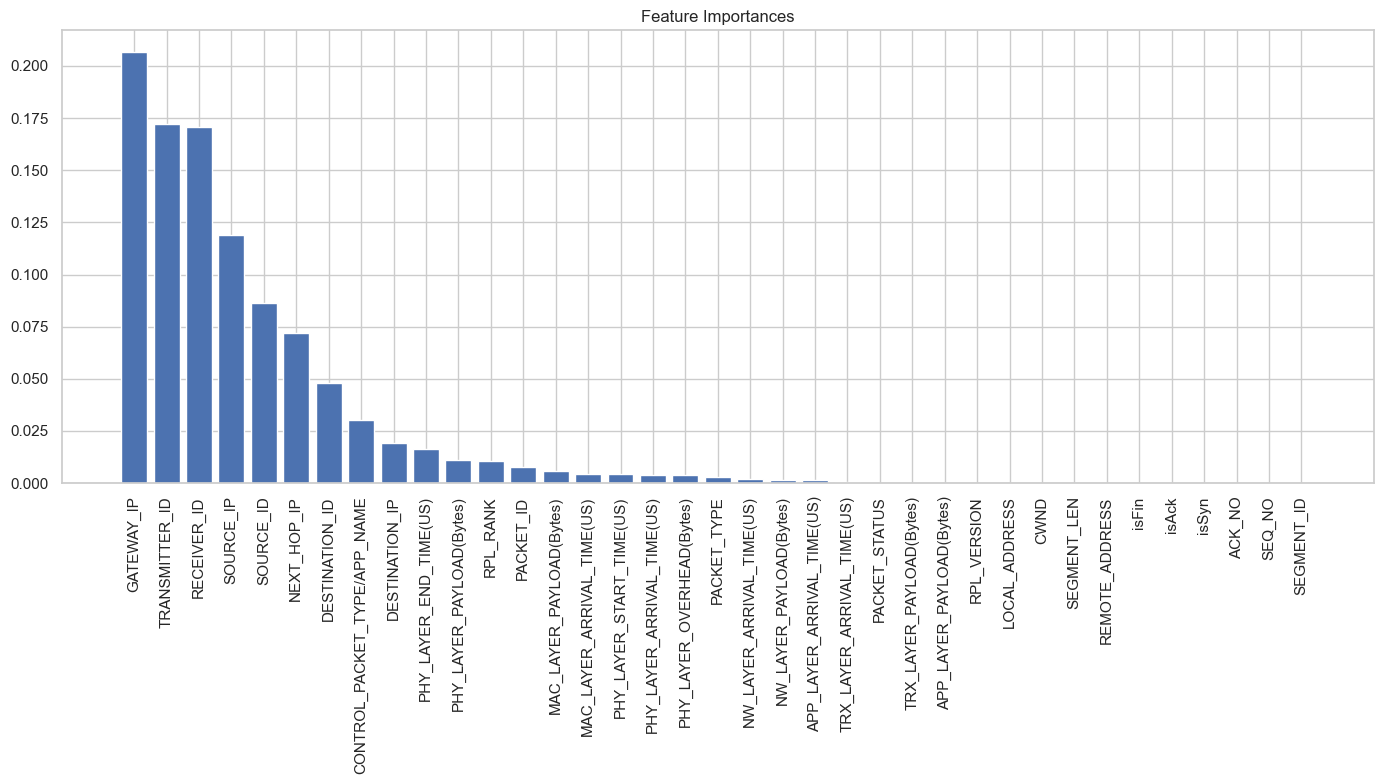

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load the dataset
df = pd.read_csv('Rank.csv')

# 1. Cleaning the dataset
# Drop 'Unnamed: 38' column if exists
df = df.drop(columns=['Unnamed: 38'], errors='ignore')

# Fill missing values (correct safe way)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Ensure no NaNs
df = df.fillna(0)

# Drop duplicates
df = df.drop_duplicates()

# 2. Encoding categorical features
cat_cols = [
    'PACKET_TYPE',
    'CONTROL_PACKET_TYPE/APP_NAME',
    'SOURCE_ID',
    'DESTINATION_ID',
    'TRANSMITTER_ID',
    'RECEIVER_ID',
    'PACKET_STATUS',
    'SOURCE_IP',
    'DESTINATION_IP',
    'GATEWAY_IP',
    'NEXT_HOP_IP'
]

le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# 3. Set features and target
feature_columns = [
    'PACKET_ID', 'SEGMENT_ID', 'PACKET_TYPE', 'CONTROL_PACKET_TYPE/APP_NAME',
    'SOURCE_ID', 'DESTINATION_ID', 'TRANSMITTER_ID', 'RECEIVER_ID',
    'APP_LAYER_ARRIVAL_TIME(US)', 'TRX_LAYER_ARRIVAL_TIME(US)', 'NW_LAYER_ARRIVAL_TIME(US)',
    'MAC_LAYER_ARRIVAL_TIME(US)', 'PHY_LAYER_ARRIVAL_TIME(US)', 'PHY_LAYER_START_TIME(US)',
    'PHY_LAYER_END_TIME(US)', 'APP_LAYER_PAYLOAD(Bytes)', 'TRX_LAYER_PAYLOAD(Bytes)',
    'NW_LAYER_PAYLOAD(Bytes)', 'MAC_LAYER_PAYLOAD(Bytes)', 'PHY_LAYER_PAYLOAD(Bytes)',
    'PHY_LAYER_OVERHEAD(Bytes)', 'PACKET_STATUS', 'LOCAL_ADDRESS', 'REMOTE_ADDRESS',
    'CWND', 'SEQ_NO', 'ACK_NO', 'isSyn', 'isAck', 'isFin', 'SEGMENT_LEN',
    'SOURCE_IP', 'DESTINATION_IP', 'GATEWAY_IP', 'NEXT_HOP_IP',
    'RPL_RANK', 'RPL_VERSION'
]

X = df[feature_columns]
y = df['PCKT_LABEL']

# 4. Balancing with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5. Training a Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Printing evaluation metrics
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# 7. Plot ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 8. Plot Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = np.array(feature_columns)

plt.figure(figsize=(14, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()